# Case Study #3 - Foodie-Fi

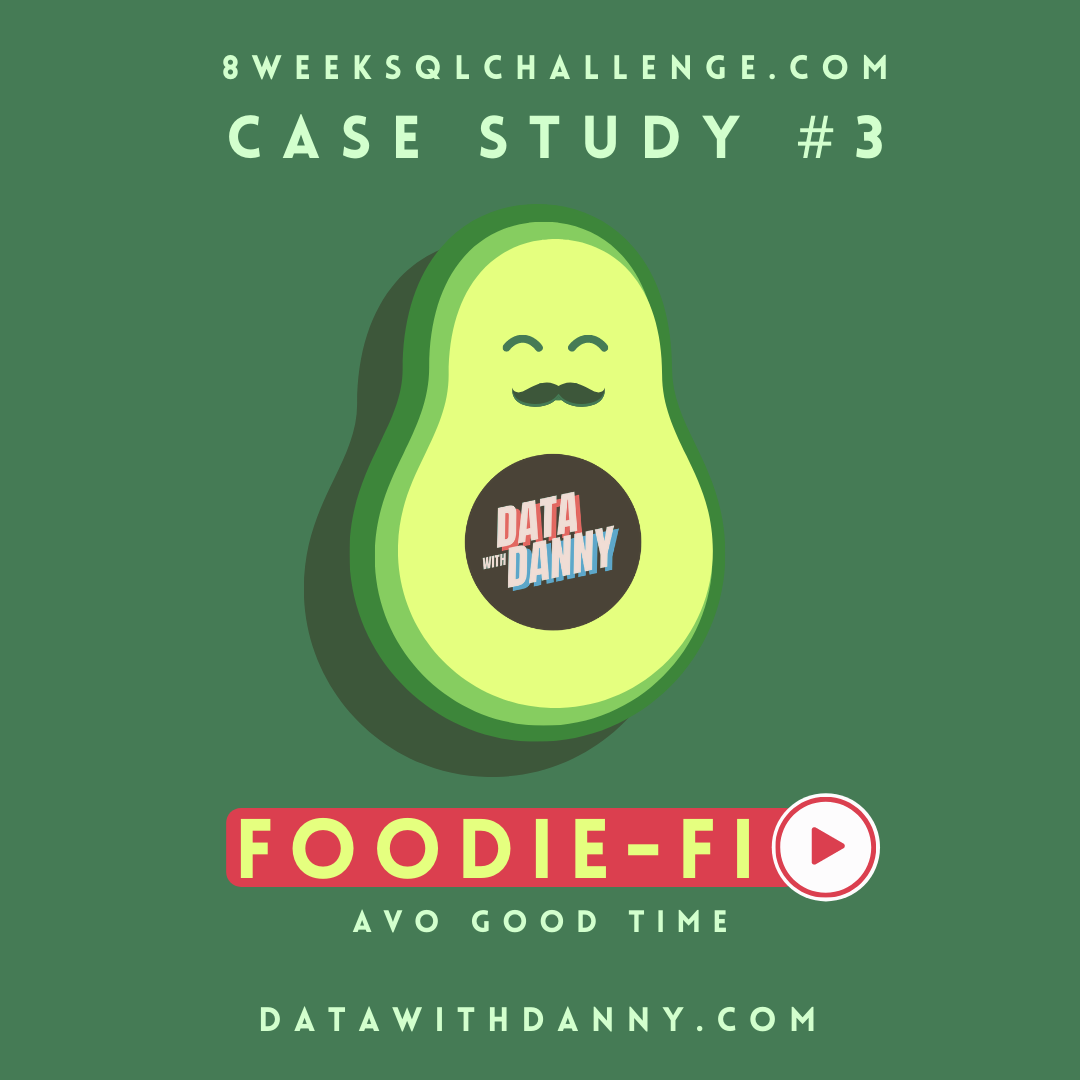

---

## Introduction

Subscription based businesses are super popular and Danny realised that there was a large gap in the market - he wanted to create a new streaming service that only had food related content - something like Netflix but with only cooking shows!

Danny finds a few smart friends to launch his new startup Foodie-Fi in 2020 and started selling monthly and annual subscriptions, giving their customers unlimited on-demand access to exclusive food videos from around the world!

Danny created Foodie-Fi with a data driven mindset and wanted to ensure all future investment decisions and new features were decided using data. This case study focuses on using subscription style digital data to answer important business questions.

---

## Available Data

Danny has shared the data design for Foodie-Fi and also short descriptions on each of the database tables - our case study focuses on only 2 tables but there will be a challenge to create a new table for the Foodie-Fi team.

All datasets exist within the `foodie_fi` database schema - be sure to include this reference within your SQL scripts as you start exploring the data and answering the case study questions.

---

## Entity Relationship Diagram

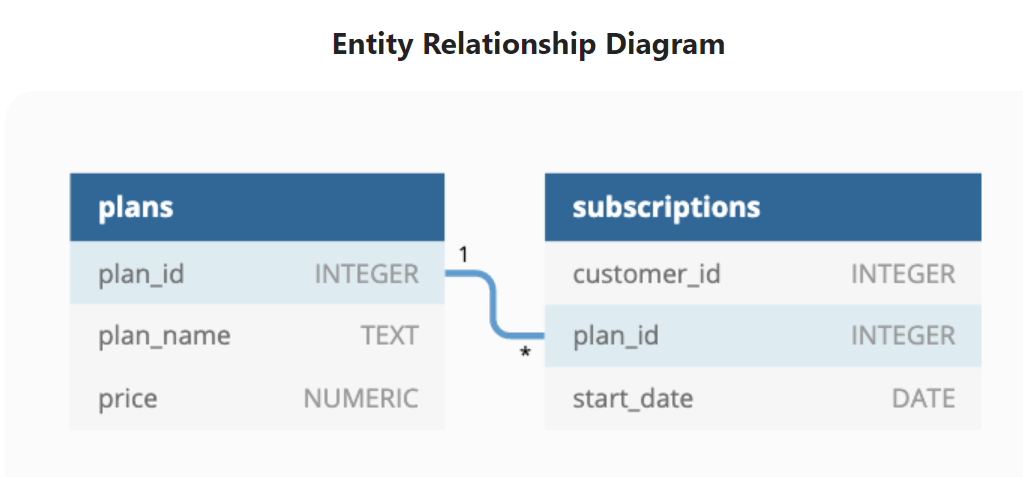

### Table 1: plans

Customers can choose which plans to join Foodie-Fi when they first sign up.

Basic plan customers have limited access and can only stream their videos and is only available monthly at \$9.90

Pro plan customers have no watch time limits and are able to download videos for offline viewing. Pro plans start at \\$19.90 a month or \\$199 for an annual subscription.

Customers can sign up to an initial 7 day free trial will automatically continue with the pro monthly subscription plan unless they cancel, downgrade to basic or upgrade to an annual pro plan at any point during the trial.

When customers cancel their Foodie-Fi service - they will have a `churn` plan record with a `null` price but their plan will continue until the end of the billing period.

| plan_id | plan_name      | price |
|---------|----------------|-------|
| 0       | trial          | 0     |
| 1       | basic monthly  | 9.90  |
| 2       | pro monthly    | 19.90 |
| 3       | pro annual     | 199   |
| 4       | churn          | null  |

### Table 2: subscriptions

Customer subscriptions show the exact date where their specific `plan_id` starts.

If customers downgrade from a pro plan or cancel their subscription - the higher plan will remain in place until the period is over - the `start_date` in the `subscriptions` table will reflect the date that the actual plan changes.

When customers upgrade their account from a basic plan to a pro or annual pro plan - the higher plan will take effect straightaway.

When customers churn - they will keep their access until the end of their current billing period but the `start_date` will be technically the day they decided to cancel their service.

| customer_id | plan_id | start_date |
|-------------|---------|------------|
| 1           | 0       | 2020-08-01 |
| 1           | 1       | 2020-08-08 |
| 2           | 0       | 2020-09-20 |
| 2           | 3       | 2020-09-27 |
| 11          | 0       | 2020-11-19 |
| 11          | 4       | 2020-11-26 |
| 13          | 0       | 2020-12-15 |
| 13          | 1       | 2020-12-22 |
| 13          | 2       | 2021-03-29 |
| 15          | 0       | 2020-03-17 |
| 15          | 2       | 2020-03-24 |
| 15          | 4       | 2020-04-29 |
| 16          | 0       | 2020-05-31 |
| 16          | 1       | 2020-06-07 |
| 16          | 3       | 2020-10-21 |
| 18          | 0       | 2020-07-06 |
| 18          | 2       | 2020-07-13 |
| 19          | 0       | 2020-06-22 |
| 19          | 2       | 2020-06-29 |
| 19          | 3       | 2020-08-29 |


## Interactive SQL Session

The Dataset for this case study can be accessed from [here](https://www.db-fiddle.com/f/rHJhRrXy5hbVBNJ6F6b9gJ/16). I will be using MySQL to solve this case study. In order to solve yourself this case study, simply go to the above link and choose MySQL Dialect (version > 8, if using MySQL version higher than 8 locally), copy & paste the Database schema into MySQL.

Here is the snapshot of it.

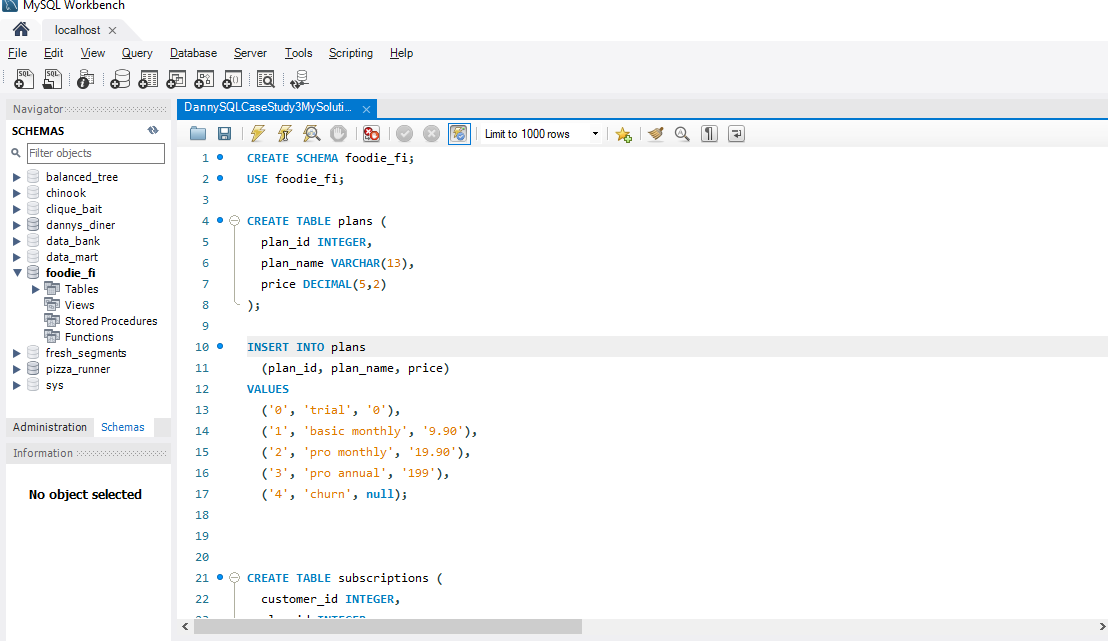

---

## Case Study Questions

This case study is split into an initial data understanding question before diving straight into data analysis questions before finishing with 1 single extension challenge.

### A. Customer Journey

Based off the 8 sample customers provided in the sample from the subscriptions table, write a brief description about each customer’s onboarding journey.

Try to keep it as short as possible - you may also want to run some sort of join to make your explanations a bit easier!

### B. Data Analysis Questions

1) How many customers has Foodie-Fi ever had?

2) What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value.

3) What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name.

4) What is the customer count and percentage of customers who have churned rounded to 1 decimal place?

5) How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?

6) What is the number and percentage of customer plans after their initial free trial?

7) What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?

8) How many customers have upgraded to an annual plan in 2020?

9) How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?

10) Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)

11) How many customers downgraded from a pro monthly to a basic monthly plan in 2020?

### C. Challenge Payment Question

The Foodie-Fi team wants you to create a new payments table for the year 2020 that includes amounts paid by each customer in the subscriptions table with the following requirements:

- monthly payments always occur on the same day of month as the original start_date of any monthly paid plan
- upgrades from basic to monthly or pro plans are reduced by the current paid amount in that month and start immediately
- upgrades from pro monthly to pro annual are paid at the end of the current billing period and also starts at the end of the month period
- once a customer churns they will no longer make payments

Example outputs for this table might look like the following:

| customer_id | plan_id | plan_name       | payment_date | amount | payment_order |
|-------------|---------|-----------------|--------------|--------|---------------|
| 1           | 1       | basic monthly   | 2020-08-08   | 9.90   | 1             |
| 1           | 1       | basic monthly   | 2020-09-08   | 9.90   | 2             |
| 1           | 1       | basic monthly   | 2020-10-08   | 9.90   | 3             |
| 1           | 1       | basic monthly   | 2020-11-08   | 9.90   | 4             |
| 1           | 1       | basic monthly   | 2020-12-08   | 9.90   | 5             |
| 2           | 3       | pro annual       | 2020-09-27   | 199.00 | 1             |
| 13          | 1       | basic monthly   | 2020-12-22   | 9.90   | 1             |
| 15          | 2       | pro monthly      | 2020-03-24   | 19.90  | 1             |
| 15          | 2       | pro monthly      | 2020-04-24   | 19.90  | 2             |
| 16          | 1       | basic monthly   | 2020-06-07   | 9.90   | 1             |
| 16          | 1       | basic monthly   | 2020-07-07   | 9.90   | 2             |
| 16          | 1       | basic monthly   | 2020-08-07   | 9.90   | 3             |
| 16          | 1       | basic monthly   | 2020-09-07   | 9.90   | 4             |
| 16          | 1       | basic monthly   | 2020-10-07   | 9.90   | 5             |
| 16          | 3       | pro annual       | 2020-10-21   | 189.10| 6             |
| 18          | 2       | pro monthly      | 2020-07-13   | 19.90  | 1             |
| 18          | 2       | pro monthly      | 2020-08-13   | 19.90  | 2             |
| 18          | 2       | pro monthly      | 2020-09-13   | 19.90  | 3             |
| 18          | 2       | pro monthly      | 2020-10-13   | 19.90  | 4             |
| 18          | 2       | pro monthly      | 2020-11-13   | 19.90  | 5             |
| 18          | 2       | pro monthly      | 2020-12-13   | 19.90  | 6             |
| 19          | 2       | pro monthly      | 2020-06-29   | 19.90  | 1             |
| 19          | 2       | pro monthly      | 2020-07-29   | 19.90  | 2             |
| 19          | 3       | pro annual       | 2020-08-29   | 199.00 | 3             |

### D. Outside The Box Questions

The following are open ended questions which might be asked during a technical interview for this case study - there are no right or wrong answers, but answers that make sense from both a technical and a business perspective make an amazing impression!

1) How would you calculate the rate of growth for Foodie-Fi?

2) What key metrics would you recommend Foodie-Fi management to track over time to assess performance of their overall business?

3) What are some key customer journeys or experiences that you would analyse further to improve customer retention?

4) If the Foodie-Fi team were to create an exit survey shown to customers who wish to cancel their subscription, what questions would you include in the survey?

5) What business levers could the Foodie-Fi team use to reduce the customer churn rate? How would you validate the effectiveness of your ideas?

## Let's start solving them.

### A. Customer Journey

Based off the 8 sample customers provided in the sample from the subscriptions table, write a brief description about each customer’s onboarding journey.

Try to keep it as short as possible - you may also want to run some sort of join to make your explanations a bit easier!

### B. Data Analysis Questions

- **1. How many customers has Foodie-Fi ever had?**

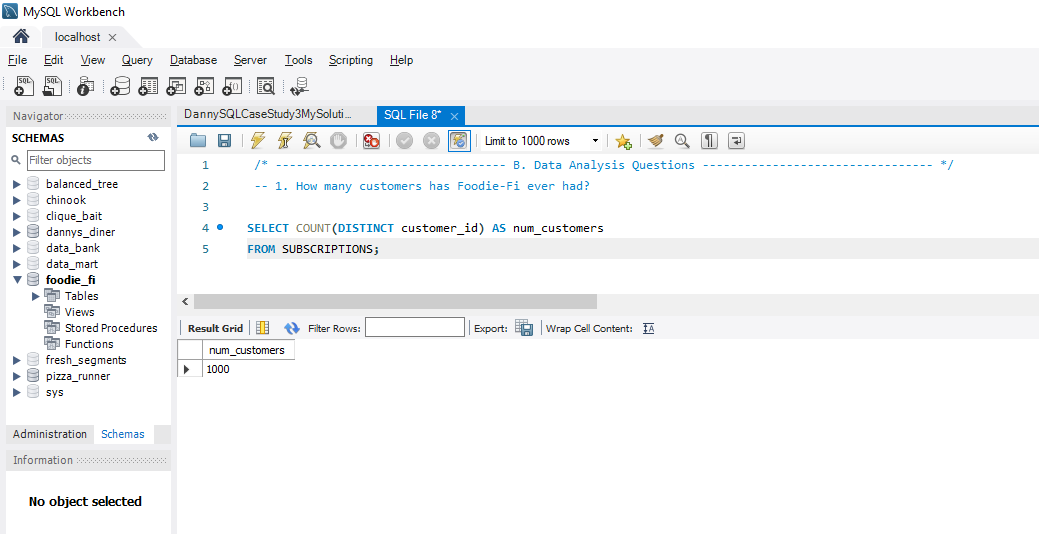

- **2. What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value.**

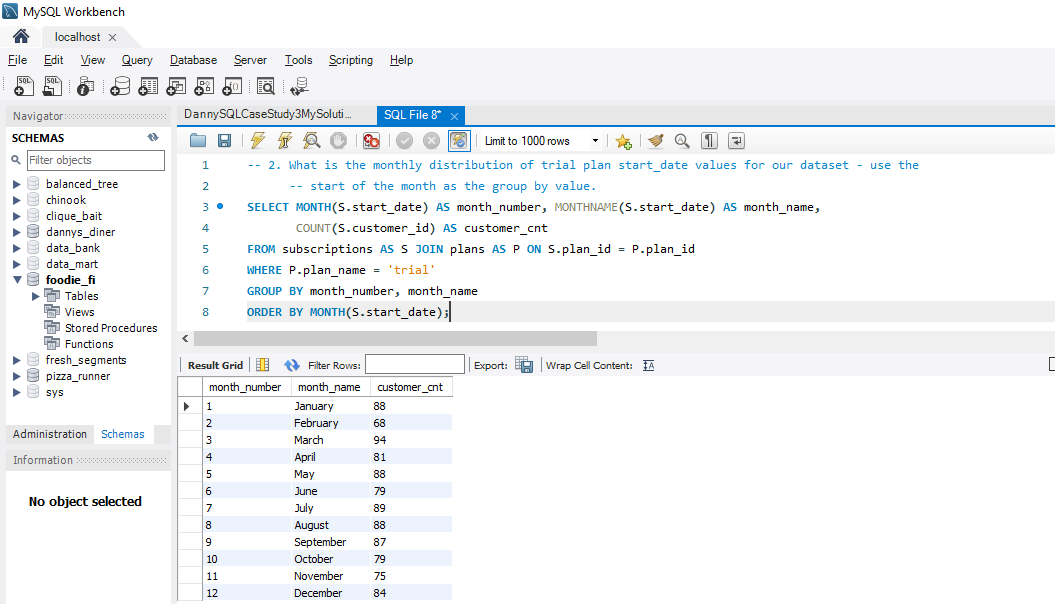

- **3. What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name.**

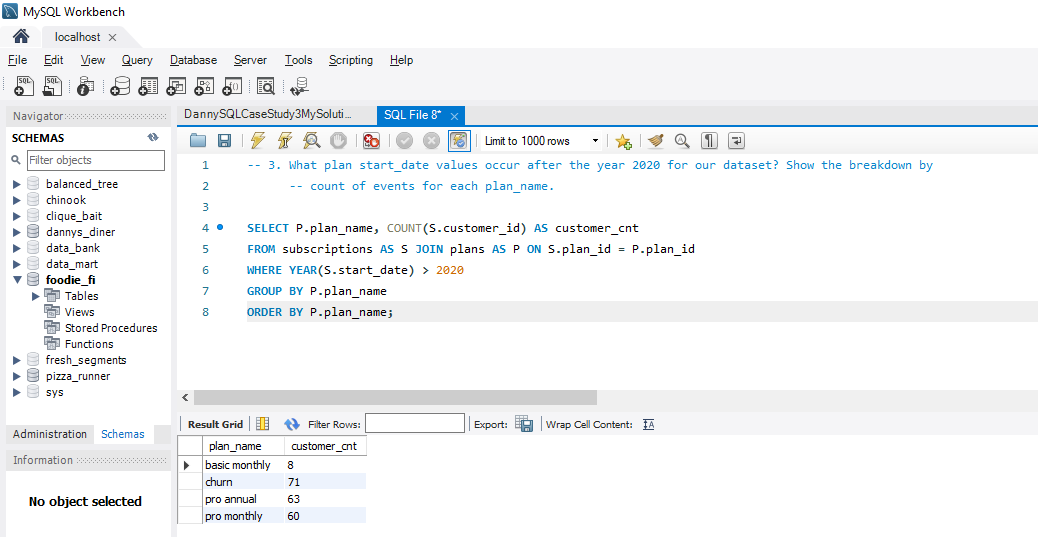

- **4. What is the customer count and percentage of customers who have churned rounded to 1 decimal place?**

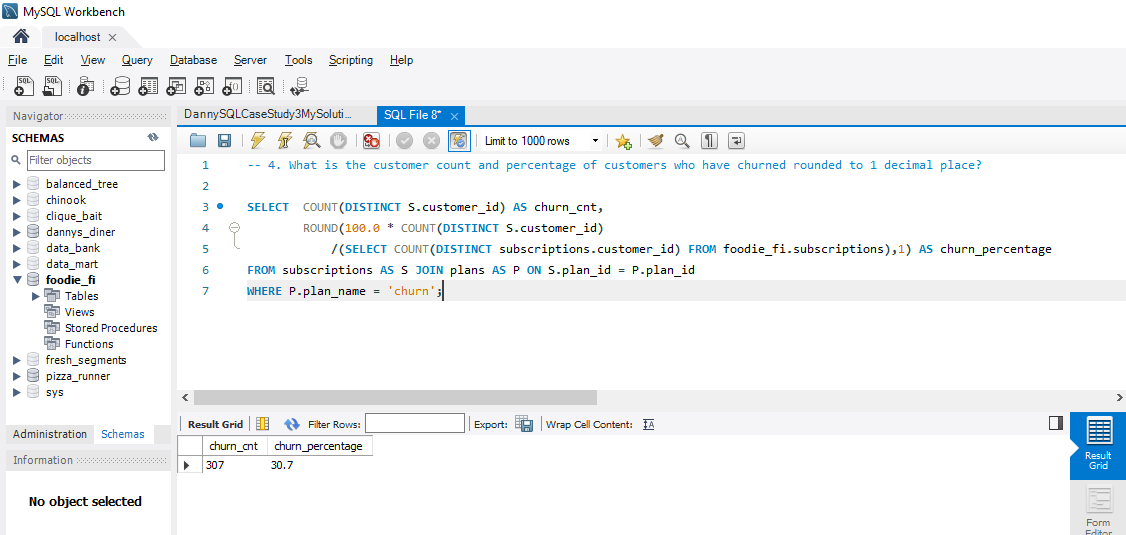

- **5. How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?**

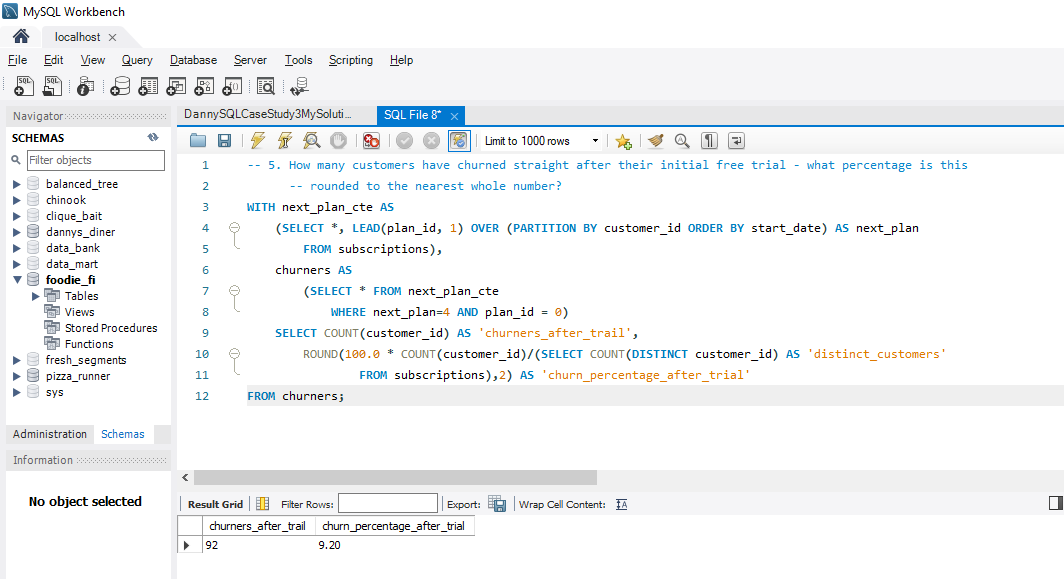

- **6. What is the number and percentage of customer plans after their initial free trial?**

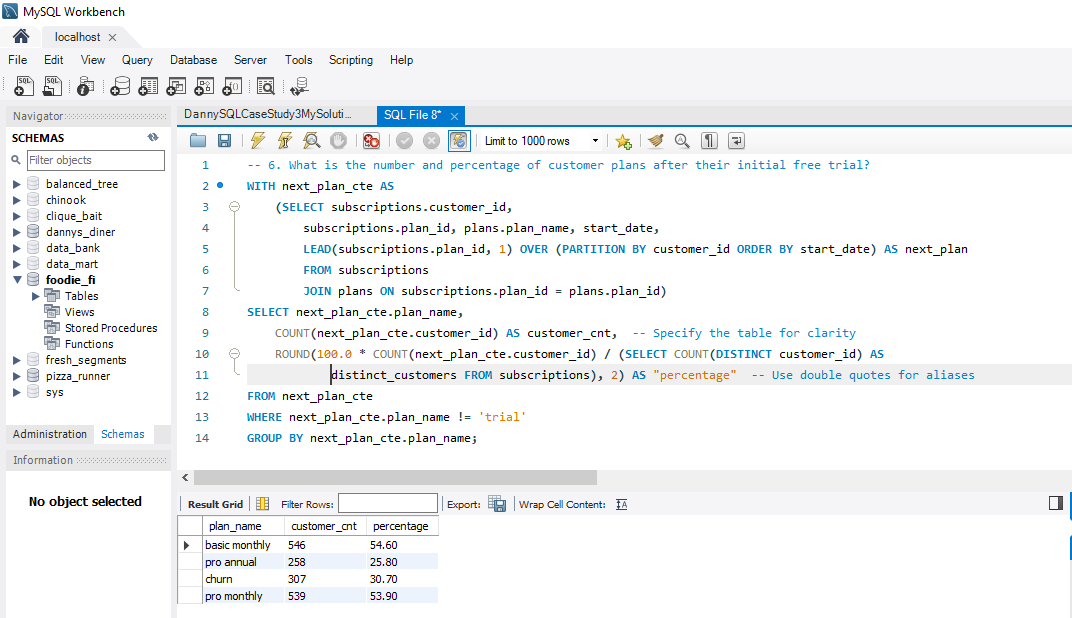

- **7. What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?**



- **8. How many customers have upgraded to an annual plan in 2020?**

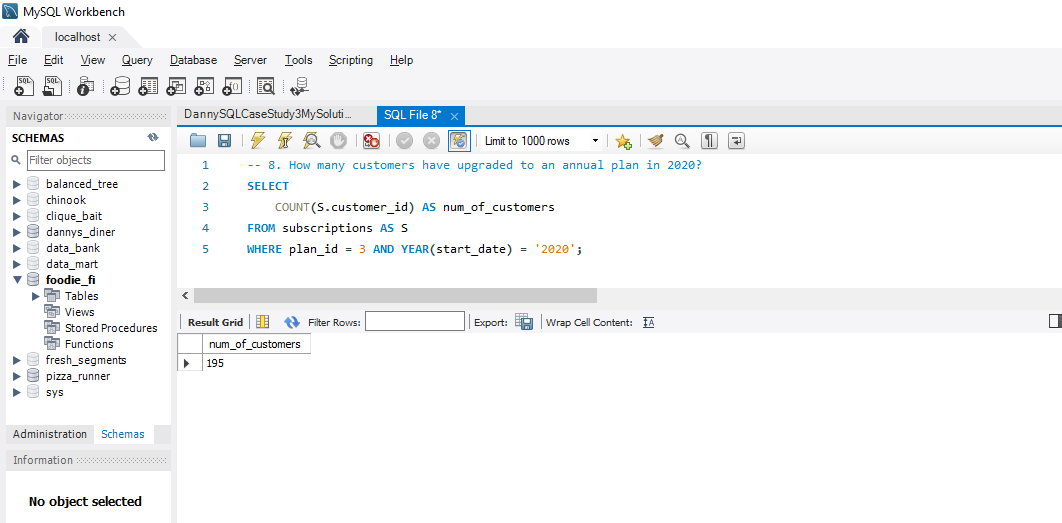

- **9. How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?**

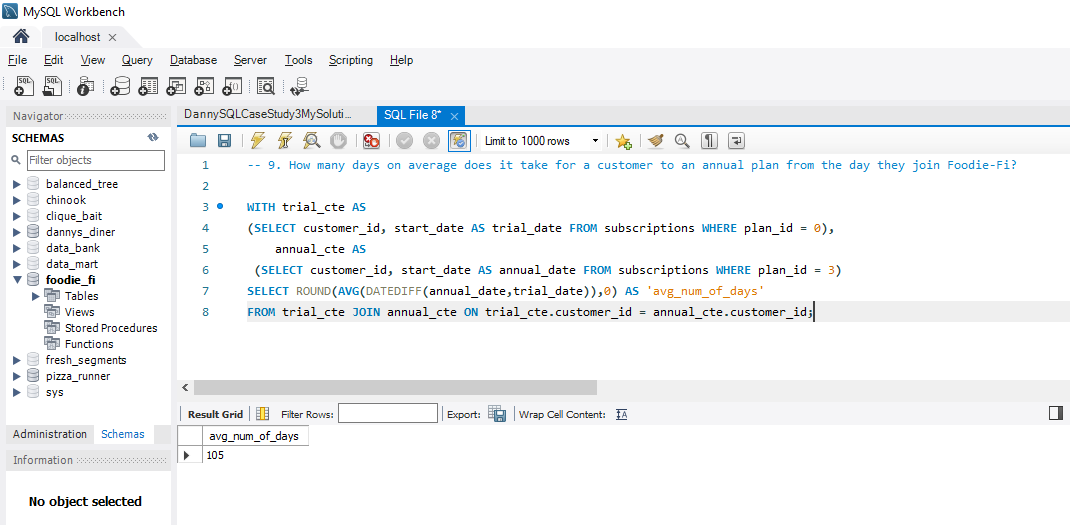

- **10. Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)**



- **11. How many customers downgraded from a pro monthly to a basic monthly plan in 2020?**

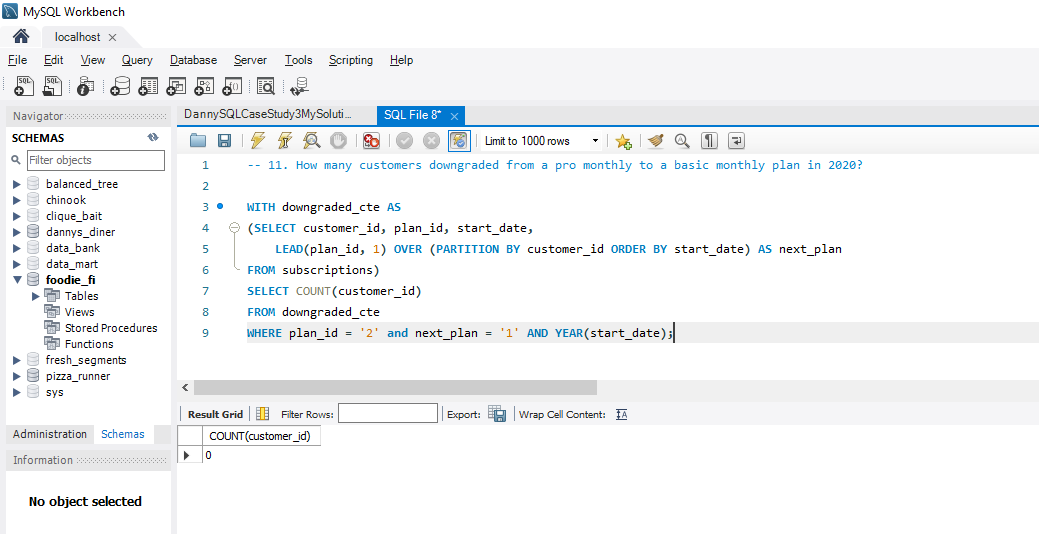

### C. Challenge Payment Question

The Foodie-Fi team wants you to create a new payments table for the year 2020 that includes amounts paid by each customer in the subscriptions table with the following requirements:

- monthly payments always occur on the same day of month as the original start_date of any monthly paid plan
- upgrades from basic to monthly or pro plans are reduced by the current paid amount in that month and start immediately
- upgrades from pro monthly to pro annual are paid at the end of the current billing period and also starts at the end of the month period
- once a customer churns they will no longer make payments

Example outputs for this table might look like the following:

| customer_id | plan_id | plan_name       | payment_date | amount | payment_order |
|-------------|---------|-----------------|--------------|--------|---------------|
| 1           | 1       | basic monthly   | 2020-08-08   | 9.90   | 1             |
| 1           | 1       | basic monthly   | 2020-09-08   | 9.90   | 2             |
| 1           | 1       | basic monthly   | 2020-10-08   | 9.90   | 3             |
| 1           | 1       | basic monthly   | 2020-11-08   | 9.90   | 4             |
| 1           | 1       | basic monthly   | 2020-12-08   | 9.90   | 5             |
| 2           | 3       | pro annual       | 2020-09-27   | 199.00 | 1             |
| 13          | 1       | basic monthly   | 2020-12-22   | 9.90   | 1             |
| 15          | 2       | pro monthly      | 2020-03-24   | 19.90  | 1             |
| 15          | 2       | pro monthly      | 2020-04-24   | 19.90  | 2             |
| 16          | 1       | basic monthly   | 2020-06-07   | 9.90   | 1             |
| 16          | 1       | basic monthly   | 2020-07-07   | 9.90   | 2             |
| 16          | 1       | basic monthly   | 2020-08-07   | 9.90   | 3             |
| 16          | 1       | basic monthly   | 2020-09-07   | 9.90   | 4             |
| 16          | 1       | basic monthly   | 2020-10-07   | 9.90   | 5             |
| 16          | 3       | pro annual       | 2020-10-21   | 189.10| 6             |
| 18          | 2       | pro monthly      | 2020-07-13   | 19.90  | 1             |
| 18          | 2       | pro monthly      | 2020-08-13   | 19.90  | 2             |
| 18          | 2       | pro monthly      | 2020-09-13   | 19.90  | 3             |
| 18          | 2       | pro monthly      | 2020-10-13   | 19.90  | 4             |
| 18          | 2       | pro monthly      | 2020-11-13   | 19.90  | 5             |
| 18          | 2       | pro monthly      | 2020-12-13   | 19.90  | 6             |
| 19          | 2       | pro monthly      | 2020-06-29   | 19.90  | 1             |
| 19          | 2       | pro monthly      | 2020-07-29   | 19.90  | 2             |
| 19          | 3       | pro annual       | 2020-08-29   | 199.00 | 3             |

The following is the SQL query to achieve the above result.

### D. Outside The Box Questions

The following are open ended questions which might be asked during a technical interview for this case study - there are no right or wrong answers, but answers that make sense from both a technical and a business perspective make an amazing impression!

- **1. How would you calculate the rate of growth for Foodie-Fi?**



- **2. What key metrics would you recommend Foodie-Fi management to track over time to assess performance of their overall business?**


- **3. What are some key customer journeys or experiences that you would analyse further to improve customer retention?**



- **4. If the Foodie-Fi team were to create an exit survey shown to customers who wish to cancel their subscription, what questions would you include in the survey?**



- **5. What business levers could the Foodie-Fi team use to reduce the customer churn rate? How would you validate the effectiveness of your ideas?**
